# Prática guiada: Importância dos recursos em modelos Ensemble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('cars.csv')

le = LabelEncoder()
y = le.fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

In [2]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y)

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

A floresta aleatória expõe a importância dos recursos e a calcula como a média da importância dos recursos das árvores de base. Vamos verificar isso.

In [3]:
importâncias = rf.feature_importances_
print (all(importâncias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))

True


Preencher os espaços no código:

In [4]:
# Calcular o desvio padrão da importância dos recursos executando um loop nas árvores na floresta aleatória
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

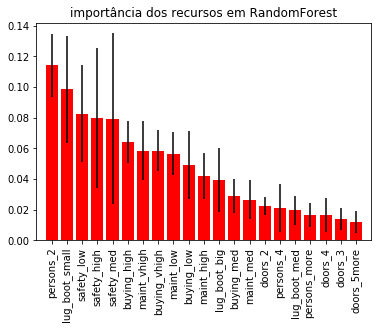

In [5]:
índices = np.argsort(importâncias)[::-1]
nomes_features = X.columns

# Representar graficamente a importância dos recursos na floresta aleatória
plt.figure()
plt.title("importância dos recursos em RandomForest")
plt.bar(range(X.shape[1]), importâncias[índices],
       color="r", yerr=std[índices], align="center")
plt.xticks(range(X.shape[1]), nomes_features[índices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Agora repetir o processo para calcular e representar graficamente a importância dos recursos em ExtraTrees

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


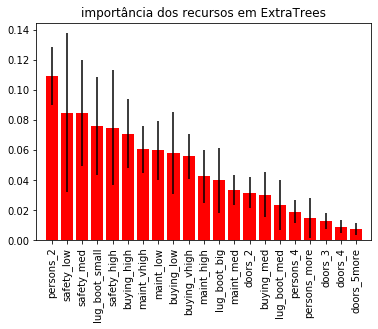

In [6]:
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

et.fit(X, y)
importâncias = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)


índices = np.argsort(importâncias)[::-1]
nomes_features = X.columns

# Representar a importância dos recursos
plt.figure()
plt.title("importância dos recursos em ExtraTrees")
plt.bar(range(X.shape[1]), importâncias[índices],
       color="r", yerr=std[índices], align="center")
plt.xticks(range(X.shape[1]), nomes_features[índices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Por fim, vamos comparar os 3 modelos

,imp Árvore Decisão,imp Random Forest,imp Extra Trees
12,0.233312,0.114079,0.109290
17,0.094315,0.098547,0.075992
19,0.155542,0.082684,0.084882
18,0.078594,0.079713,0.074951
20,0.030887,0.079262,0.084781


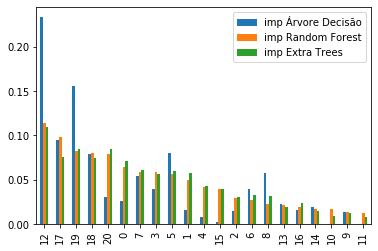

In [7]:
dt2 = DecisionTreeClassifier()
dt2.fit(X, y)
importâncias=pd.DataFrame({'imp Árvore Decisão':dt2.feature_importances_,'imp Random Forest':rf.feature_importances_,'imp Extra Trees':et.feature_importances_}).sort_values(['imp Random Forest'], ascending=False)
importâncias.plot(kind='bar')
importâncias.head()